In [13]:
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
df = pd.read_excel(r'jobs_in_data.xlsx')
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = cols
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [15]:
df.shape

(9355, 12)

In [16]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [17]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [18]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [19]:
df._get_numeric_data().columns

Index(['work_year', 'salary', 'salary_in_usd'], dtype='object')

In [20]:
df.select_dtypes(include=['object']).columns

Index(['job_title', 'job_category', 'salary_currency', 'employee_residence',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size'],
      dtype='object')

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


In [22]:
numerical = df._get_numeric_data()
numerical.dtypes

work_year        int64
salary           int64
salary_in_usd    int64
dtype: object

In [23]:
categorical = df.select_dtypes(include=['object'])
categorical.dtypes

job_title             object
job_category          object
salary_currency       object
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [24]:
def correlation_hmap(table):
    correlations_matrix = table.corr()
    sns.heatmap(correlations_matrix, annot=True)
    plt.show()

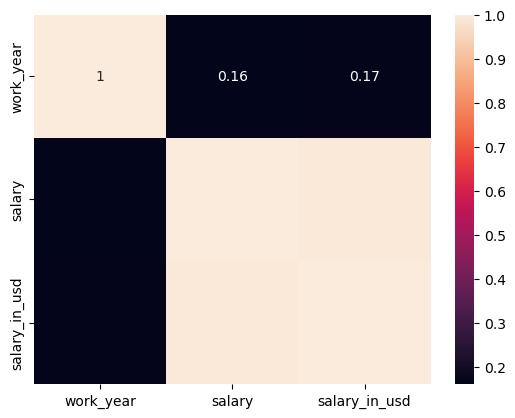

In [25]:
correlation_hmap(numerical)

In [26]:
categorical.head()

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,Data DevOps Engineer,Data Engineering,EUR,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,Data Architect,Data Architecture and Modeling,USD,United States,Senior,Full-time,In-person,United States,M
2,Data Architect,Data Architecture and Modeling,USD,United States,Senior,Full-time,In-person,United States,M
3,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
4,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M


In [27]:
categorical.policy_type.unique()

AttributeError: 'DataFrame' object has no attribute 'policy_type'